# 서울시 구별 CCTV 현황 분석하기
- 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
- Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
- Pandas의 Matplotlib의 기본적 사용법을 확인 
- 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [126]:
import numpy as np
import pandas as pd

CCTV_Seoul = pd.read_csv("C:\\Users\\one1e\\Desktop\\깃허브 연동폴더\\Seoul_CCTV_Status_Analysis\\01. CCTV_in_Seoul.csv", encoding = "utf-8")
CCTV_Seoul.rename(columns ={CCTV_Seoul.columns[0]:"구별"},inplace=True)
CCTV_Seoul.head() #상위 5개


,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [127]:
pop_Seoul = pd.read_excel("C:\\Users\\one1e\\Desktop\\깃허브 연동폴더\\Seoul_CCTV_Status_Analysis\\01. population_in_Seoul.xlsx")
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


# CCTV 데이터 파악하기

In [128]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [129]:
CCTV_Seoul.sort_values(by="소계",ascending=True).head(5)


,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [130]:
CCTV_Seoul.sort_values(by="소계",ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [131]:
CCTV_Seoul["최근증가율"] = (CCTV_Seoul["2016년"]+CCTV_Seoul["2015년"]+  
                      CCTV_Seoul["2014년"])/CCTV_Seoul["2013년도 이전"]*100
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)  
#\은 어차피 인식못하니 넘기고싶을떄 쓴다 괄호있으니 상관없음

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 서울시 인구 데이터 파악하기

In [132]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [133]:
pop_Seoul = pd.read_excel("C:\\Users\\one1e\\Desktop\\깃허브 연동폴더\\Seoul_CCTV_Status_Analysis\\01. population_in_Seoul.xlsx", header = 2, usecols = "B,D,G,J,N")
pop_Seoul.rename(columns = {pop_Seoul.columns[0]:"구별", #cctv자료에도 있는 '구별'로 합치기 위한 사전작업
                           pop_Seoul.columns[1]:"인구수",
                           pop_Seoul.columns[2]:"한국인",
                           pop_Seoul.columns[3]:"외국인",
                           pop_Seoul.columns[4]:"고령자"}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604,9926968,270636,1321458
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997


In [134]:
pop_Seoul.drop([0], inplace=True) #inplace = True는 지금결과를 바로 반영시키겠다는의미
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997
5,광진구,372164,357211,14953,42214


In [135]:
pop_Seoul["구별"].unique()


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [136]:
pop_Seoul[pop_Seoul["구별"].isnull()] #빈곳없음 있으면 drop으로 삭제

,구별,인구수,한국인,외국인,고령자


In [137]:
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
4,성동구,311244,303380,7864,39997,2.526635,12.850689
5,광진구,372164,357211,14953,42214,4.017852,11.342849


In [138]:
pop_Seoul.sort_values(by="인구수",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483,660584,6899,72506,1.033584,10.862599
16,강서구,603772,597248,6524,72548,1.080540,12.015794
23,강남구,570500,565550,4950,63167,0.867660,11.072217
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


In [139]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on ="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [140]:
del data_result["2013년도 이전"] 
del data_result["2014년"] 
del data_result["2015년"] 
del data_result["2016년"] 


data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [141]:
data_result.set_index("구별",inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [142]:
np.corrcoef(data_result["고령자비율"],data_result["소계"])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [143]:
np.corrcoef(data_result["외국인비율"],data_result["소계"])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [144]:
np.corrcoef(data_result["인구수"],data_result["소계"])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [145]:
data_result.sort_values(by="소계",ascending=False).head(5) #소계가 CCTV수

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
양천구,2034,34.671731,479978,475949,4029,52975,0.839413,11.036964
서초구,1930,63.371266,450310,445994,4316,51733,0.958451,11.488308
은평구,1873,85.237258,494388,489943,4445,72334,0.899091,14.631019
용산구,1624,53.216374,244203,229456,14747,36231,6.038828,14.836427


In [146]:
data_result.sort_values(by="인구수",ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483,660584,6899,72506,1.033584,10.862599
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
노원구,1265,188.929889,569384,565565,3819,71941,0.670725,12.634883
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


- 인구수와 상관관계 0.3

# CCTV와 인구현황 그래프로 분석하기

In [151]:
import platform
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False

if platform.system() == 'Darwin':
    rc("font",family = "AppleGothic")
elif platform.system() == "Windows":
    path = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [148]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


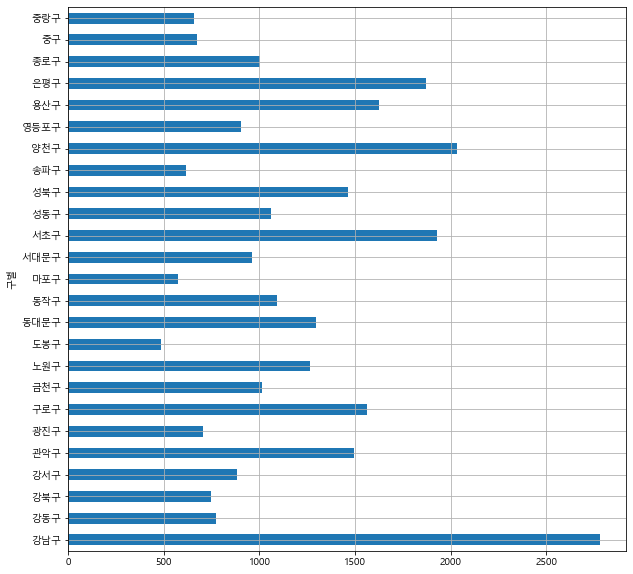

In [152]:
plt.figure()
data_result["소계"].plot(kind="barh", grid=True, figsize=(10,10))
plt.show()

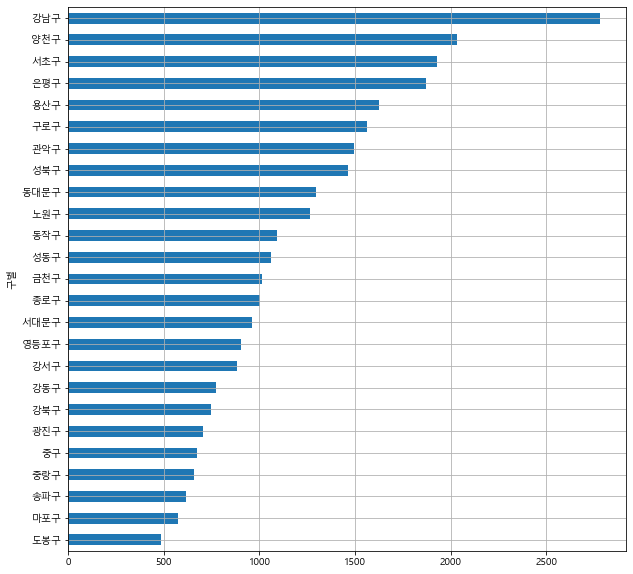

In [153]:
data_result["소계"].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

In [155]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] *100
data_result.head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217,0.487292
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638,0.170552
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342,0.226535
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291,0.284673


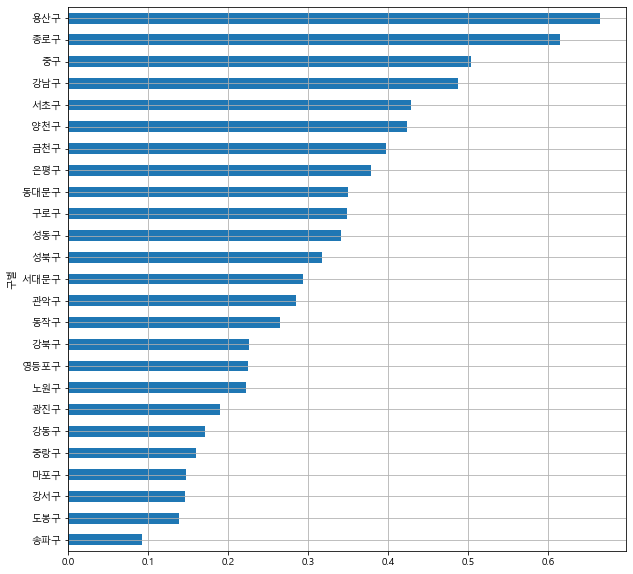

In [158]:
data_result["CCTV비율"].sort_values().plot(kind="barh",grid=True,figsize=(10,10))
plt.show()

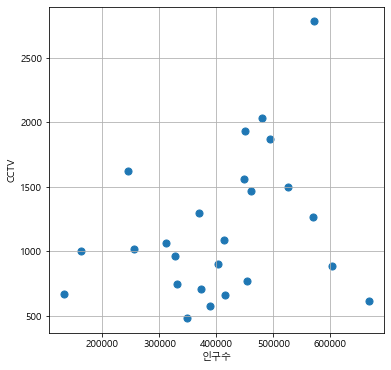

In [159]:
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()


In [160]:
fp1 = np.polyfit(data_result["인구수"],data_result["소계"],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [163]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

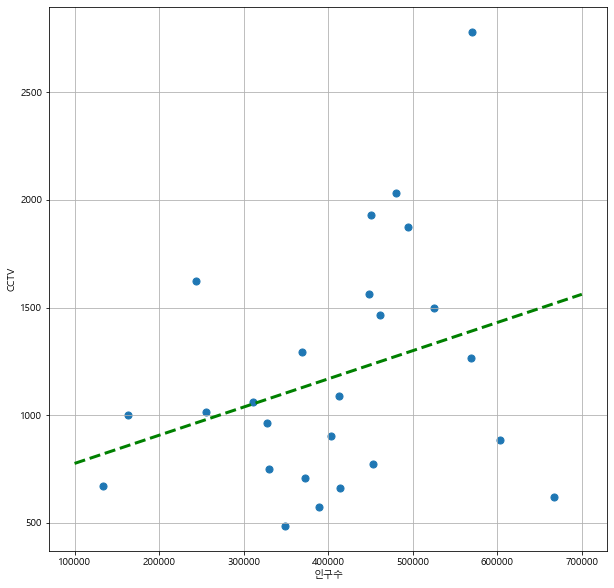

In [164]:
plt.figure(figsize=(10,10))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

In [166]:
fp1 = np.polyfit(data_result['인구수'], data_result["소계"],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000 , 100)
data_result["오차"] = np.abs(data_result["소계"]-f1(data_result["인구수"]))
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483,660584,6899,72506,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978,475949,4029,52975,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310,445994,4316,51733,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203,229456,14747,36231,6.038828,14.836427,0.665020,659.231690


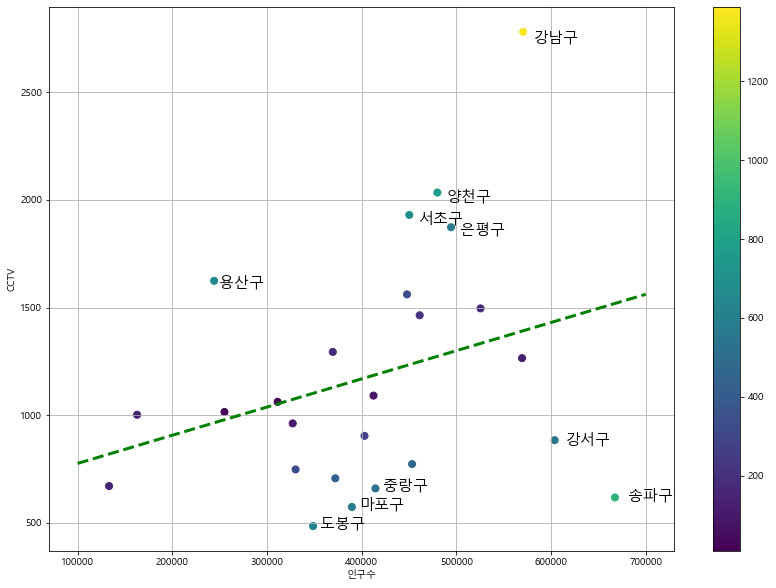

In [169]:
plt.figure(figsize =(14,10))
plt.scatter(data_result["인구수"], data_result['소계'],
            c=data_result["오차"], s=50)
plt.plot(fx, f1(fx), ls="dashed", lw=3, color='g')

for n in range(10):
    plt.text(df_sort["인구수"][n]*1.02, df_sort["소계"][n]*0.98,df_sort.index[n],
            fontsize=15)
    
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.colorbar()
plt.grid()
plt.show()